# IMPORTING LIBRARIES

In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2022-12-18 19:50:08.519783: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-18 19:50:08.802749: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-18 19:50:08.802780: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-18 19:50:08.838645: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-18 19:50:10.285287: W tensorflow/stream_executor/platform/de

# DATA PREPROCESSING

In [2]:
# GETING DATASET
gdrive_path = './dataset/'
# DATA SEGMENTATION
# PREPROCESSING THE TRAINING SET
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.22)
training_set = datagen.flow_from_directory(directory=gdrive_path,
                                            target_size=(224,224),
                                            color_mode="rgb",
                                            subset="training",
                                            class_mode="binary",
                                            batch_size=32,
                                            shuffle=True)

Found 2340 images belonging to 2 classes.


In [3]:
valid_generator=datagen.flow_from_directory( directory=gdrive_path,
                                                target_size=(224,224),
                                                color_mode="rgb",
                                                subset="validation",
                                                class_mode="binary",
                                                batch_size=32,
                                                shuffle=True)

Found 660 images belonging to 2 classes.


In [4]:
training_set.class_indices

{'no': 0, 'yes': 1}

In [5]:
# showing some image from training
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

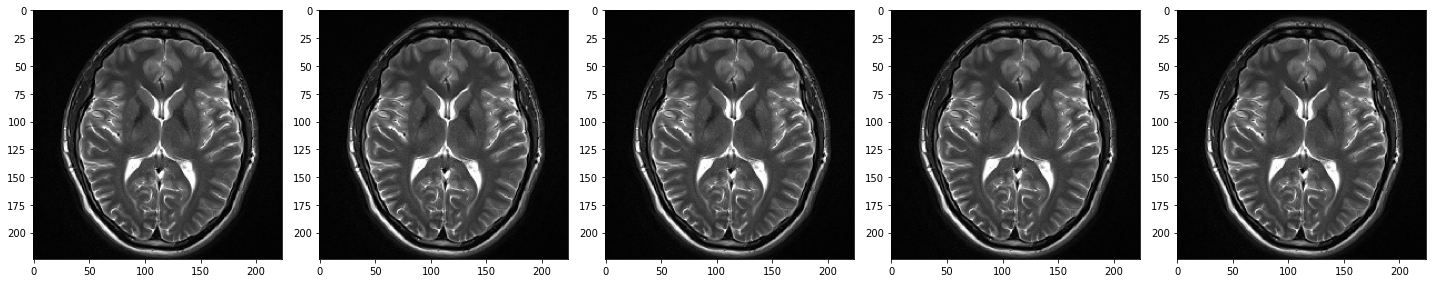

In [6]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

# TRAINING

In [7]:
BATCH_SIZE = 5
IMG_SHAPE = 224 # match image dimension to mobile net input keep same

In [8]:
# GET THE MOBILENET NEURAL NETWORK
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net = hub.KerasLayer(URL, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))
mobile_net.trainable = False

2022-12-18 19:50:36.015274: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-18 19:50:36.015305: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-18 19:50:36.015326: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (CODERED): /proc/driver/nvidia/version does not exist
2022-12-18 19:50:36.015541: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model = tf.keras.models.Sequential([
    mobile_net,
    # ANN layer
    tf.keras.layers.Dense(1, activation='sigmoid') #[0, 1] or [1, 0]
    ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(training_set, epochs=45, validation_data = valid_generator)

Epoch 1/45
74/74 [==============================] - 88s 1s/step - loss: 0.4778 - accuracy: 0.7842 - val_loss: 0.3430 - val_accuracy: 0.8712
Epoch 2/45
74/74 [==============================] - 84s 1s/step - loss: 0.2970 - accuracy: 0.9000 - val_loss: 0.3016 - val_accuracy: 0.8606
Epoch 3/45
74/74 [==============================] - 84s 1s/step - loss: 0.2375 - accuracy: 0.9256 - val_loss: 0.2456 - val_accuracy: 0.9227
Epoch 4/45
74/74 [==============================] - 84s 1s/step - loss: 0.2057 - accuracy: 0.9363 - val_loss: 0.2204 - val_accuracy: 0.9167
Epoch 5/45
74/74 [==============================] - 85s 1s/step - loss: 0.1801 - accuracy: 0.9457 - val_loss: 0.2028 - val_accuracy: 0.9242
Epoch 6/45
74/74 [==============================] - 85s 1s/step - loss: 0.1645 - accuracy: 0.9551 - val_loss: 0.1881 - val_accuracy: 0.9273
Epoch 7/45
74/74 [==============================] - 85s 1s/step - loss: 0.1517 - accuracy: 0.9526 - val_loss: 0.1804 - val_accuracy: 0.9303
Epoch 8/45
74/74 [==

# SAVING THE MODEL

In [13]:
tf.keras.models.save_model(model,'my_model.hdf5')